D:\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


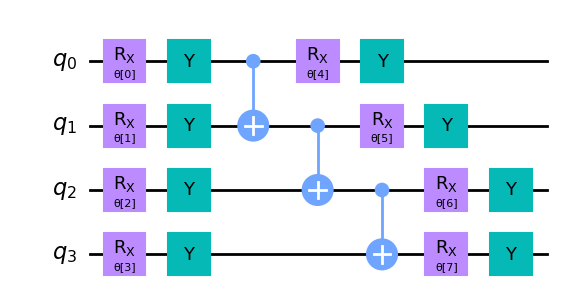

In [1]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)
ansatz.decompose().draw("mpl")

In [2]:
from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account("2e433c09c9a3d034dc924cd7f280c49f7cc89518663e74863db06c8903eafcde3300afbdb6273405def2e71dd9864573e4f6db76c9e695f6c64fc111d67efe1a",overwrite=True)
IBMProvider.saved_accounts()

# pode ser necessário definir o argumento "instance"
# ver na IBM quantum platform >> account >> manage account >> profile overvies
provider = IBMProvider()

In [3]:
provider.backends()

[<IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>]

In [4]:
quantum_devices_available = provider.backends(simulator=False, operational=True)

quantum_devices_available

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>]

In [5]:
backend = quantum_devices_available[0]

backend

<IBMBackend('ibm_brisbane')>

D:\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


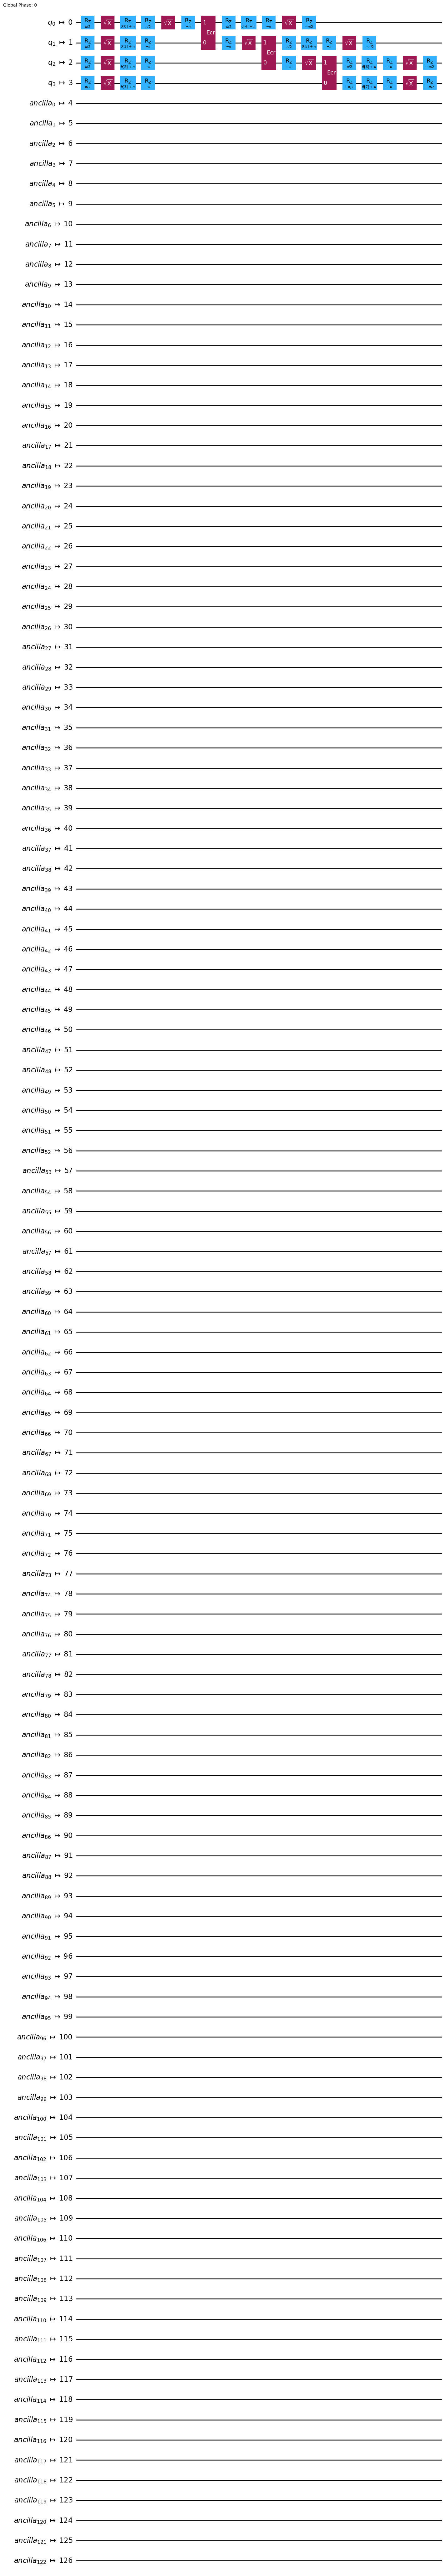

In [6]:
ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)
ansatz.decompose().draw("mpl")




from qiskit.compiler import transpile


mapped_circuit = transpile(ansatz,backend=backend)

display(mapped_circuit.draw("mpl", style="iqp"))

In [15]:
from qiskit.circuit.library import EfficientSU2

# Definindo o ansatz
ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)


# Obtendo o número de qubits do ansatz
num_qubits_ansatz = ansatz.num_qubits
print(f"Número de qubits no ansatz: {num_qubits_ansatz}")



Número de qubits no ansatz: 4


ibmqfactory.load_account:WARNING:2024-02-23 00:33:37,528: Credentials are already in use. The existing account in the session will be replaced.


Número de qubits no backend ibm_brisbane: [[Nduv(datetime.datetime(2024, 2, 22, 2, 59, 52, tzinfo=tzlocal()), T1, us, 311.13172995878585), Nduv(datetime.datetime(2024, 2, 22, 3, 14, 34, tzinfo=tzlocal()), T2, us, 69.44195580994341), Nduv(datetime.datetime(2024, 2, 22, 23, 3, 24, tzinfo=tzlocal()), frequency, GHz, 4.721862469311868), Nduv(datetime.datetime(2024, 2, 22, 23, 3, 24, tzinfo=tzlocal()), anharmonicity, GHz, -0.31197865973435573), Nduv(datetime.datetime(2024, 2, 22, 2, 39, 26, tzinfo=tzlocal()), readout_error, , 0.026800000000000046), Nduv(datetime.datetime(2024, 2, 22, 2, 39, 26, tzinfo=tzlocal()), prob_meas0_prep1, , 0.0268), Nduv(datetime.datetime(2024, 2, 22, 2, 39, 26, tzinfo=tzlocal()), prob_meas1_prep0, , 0.026800000000000046), Nduv(datetime.datetime(2024, 2, 22, 2, 39, 26, tzinfo=tzlocal()), readout_length, ns, 4000)], [Nduv(datetime.datetime(2024, 2, 22, 2, 59, 52, tzinfo=tzlocal()), T1, us, 343.80440059440565), Nduv(datetime.datetime(2024, 2, 22, 3, 31, 50, tzinfo=tz

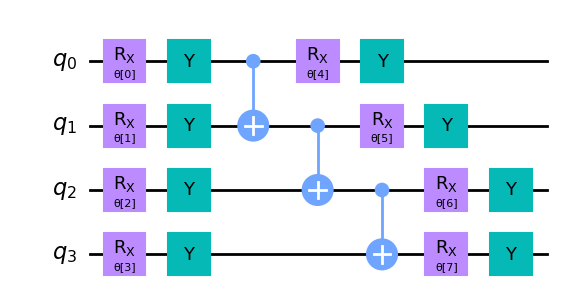

Circuito Mapeado:


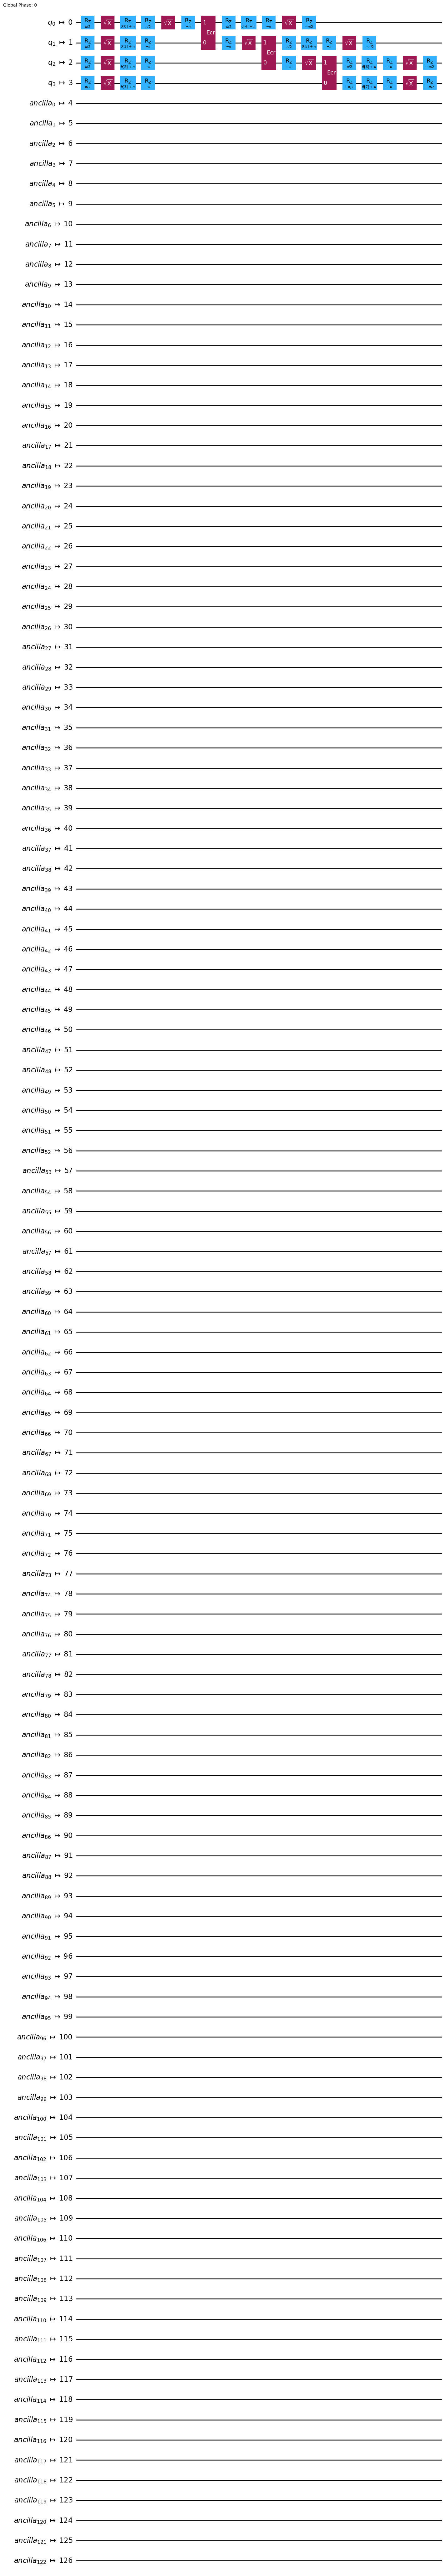

In [20]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ

# Carregando a conta do Qiskit (substitua 'TOKEN' pelo seu token real)
IBMQ.save_account('2e433c09c9a3d034dc924cd7f280c49f7cc89518663e74863db06c8903eafcde3300afbdb6273405def2e71dd9864573e4f6db76c9e695f6c64fc111d67efe1a',overwrite=True)  # Execute esta linha apenas uma vez para salvar o token
IBMQ.load_account()

# Definindo o ansatz
ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)

# Escolhendo um backend real (substitua 'ibm_brisbane' pelo backend desejado)
backend_name = 'ibm_brisbane'
backend = IBMQ.get_provider().get_backend(backend_name)

# Transpilando o ansatz para o backend
mapped_circuit = transpile(ansatz, backend=backend)

# Obtendo informações sobre o backend
backend_info = backend.properties()
num_qubits_mapped_circuit = backend_info.qubits
print(f"Número de qubits no backend {backend_name}: {num_qubits_mapped_circuit}")

# Visualizando os circuitos
print("Circuito Ansatz:")
display(ansatz.decompose().draw("mpl"))

print("Circuito Mapeado:")
display(mapped_circuit.draw("mpl", style="iqp",plot_barriers=True))


ibmqfactory.load_account:WARNING:2024-02-23 00:35:38,878: Credentials are already in use. The existing account in the session will be replaced.


Número de qubits no backend ibm_brisbane: [[Nduv(datetime.datetime(2024, 2, 22, 2, 59, 52, tzinfo=tzlocal()), T1, us, 311.13172995878585), Nduv(datetime.datetime(2024, 2, 22, 3, 14, 34, tzinfo=tzlocal()), T2, us, 69.44195580994341), Nduv(datetime.datetime(2024, 2, 22, 23, 3, 24, tzinfo=tzlocal()), frequency, GHz, 4.721862469311868), Nduv(datetime.datetime(2024, 2, 22, 23, 3, 24, tzinfo=tzlocal()), anharmonicity, GHz, -0.31197865973435573), Nduv(datetime.datetime(2024, 2, 22, 2, 39, 26, tzinfo=tzlocal()), readout_error, , 0.026800000000000046), Nduv(datetime.datetime(2024, 2, 22, 2, 39, 26, tzinfo=tzlocal()), prob_meas0_prep1, , 0.0268), Nduv(datetime.datetime(2024, 2, 22, 2, 39, 26, tzinfo=tzlocal()), prob_meas1_prep0, , 0.026800000000000046), Nduv(datetime.datetime(2024, 2, 22, 2, 39, 26, tzinfo=tzlocal()), readout_length, ns, 4000)], [Nduv(datetime.datetime(2024, 2, 22, 2, 59, 52, tzinfo=tzlocal()), T1, us, 343.80440059440565), Nduv(datetime.datetime(2024, 2, 22, 3, 31, 50, tzinfo=tz

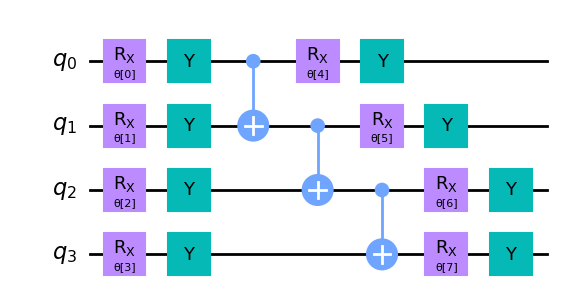

Circuito Mapeado:


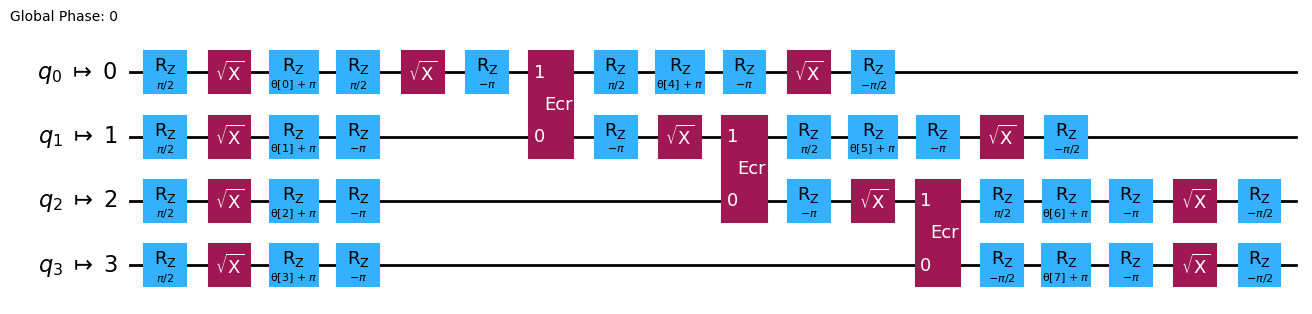

In [22]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.visualization import plot_histogram

# Carregando a conta do Qiskit (substitua 'TOKEN' pelo seu token real)
IBMQ.save_account('2e433c09c9a3d034dc924cd7f280c49f7cc89518663e74863db06c8903eafcde3300afbdb6273405def2e71dd9864573e4f6db76c9e695f6c64fc111d67efe1a', overwrite=True)  # Execute esta linha apenas uma vez para salvar o token
IBMQ.load_account()

# Definindo o ansatz
ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)

# Escolhendo um backend real (substitua 'ibm_brisbane' pelo backend desejado)
backend_name = 'ibm_brisbane'
backend = IBMQ.get_provider().get_backend(backend_name)

# Transpilando o ansatz para o backend
mapped_circuit = transpile(ansatz, backend=backend)

# Obtendo informações sobre o backend
backend_info = backend.properties()
num_qubits_mapped_circuit = backend_info.qubits
print(f"Número de qubits no backend {backend_name}: {num_qubits_mapped_circuit}")

# Visualizando os circuitos com barreiras
print("Circuito Ansatz:")
display(ansatz.decompose().draw("mpl"))

print("Circuito Mapeado:")
display(mapped_circuit.draw("mpl", style="iqp",  idle_wires=False))


In [23]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)



def count_gates(ansatz: EfficientSU2):
    gate_count = {qubit: 0 for qubit in ansatz.qubits}
    for gate in ansatz.data:
        for qubit in gate.qubits:
            gate_count[qubit] += 1
    return gate_count

def remove_unused_wires(ansatz: EfficientSU2):
    gate_count = count_gates(ansatz)
    for qubit, count in gate_count.items():
        if count == 0:
            ansatz.qubits.remove(qubit)
    return ansatz

remove_unused_wires(ansatz).draw()


┌────────────────────────────────────────────────────────┐
q_0: ┤0                                                       ├
     │                                                        │
q_1: ┤1                                                       ├
     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7]) │
q_2: ┤2                                                       ├
     │                                                        │
q_3: ┤3                                                       ├
     └────────────────────────────────────────────────────────┘